# Organize ML projects with Scikit-Learn

While Machine Learning is powerful, people often overestimate it: apply machine learning to your project, and all your problems will be solved. In reality, it's not this simple. To be effective, one needs to organize the work very well. In this notebook, we will walkthrough practical aspects of a ML project. To look at the big picture, let's start with a checklist below. It should work reasonably well for most ML projects, but make sure to adapt it to your needs:

1. **Define the scope of work and objective**
    * How is your solution be used?
    * How should performance be measured? Are there any contraints?
    * How would the problem be solved manually?
    * List the available assumptions, and verify if possible.
    
    
2. **Get the data**
    * Document where you can get that data
    * Store data in a workspace you can easily access
    * Convert the data to a format you can easily manipulate
    * Check the overview (size, type, sample, description, statistics)
    * Data cleaning
    
    
3. **EDA & Data transformation**
    * Study each attribute and its characteristics (missing values, type of distribution, usefulness)
    * Visualize the data
    * Study the correlations between attributes
    * Feature selection, Feature Engineering, Feature scaling
    * Write functions for all data transformations
    
    
4. **Train models**
    * Automate as much as possible
    * Train promising models quickly using standard parameters. Measure and compare their performance
    * Analyze the errors the models make
    * Shortlist the top three of five most promising models, preferring models that make different types of errors.


5. **Fine-tunning**
    * Treat data transformation choices as hyperparameters, expecially when you are not sure about them (e.g., replace missing values with zeros or with the median value)
    * Unless there are very few hyperparameter value to explore, prefer random search over grid search.
    * Try ensemble methods
    * Test your final model on the test set to estimate the generalization error. Don't tweak your model again, you would start overfitting the test set.

## Lab: MNIST - Handwritten digits database

### Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


### Get Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training data:', X_train.shape, y_train.shape) # training set
print('Test data:', X_test.shape, y_test.shape) # validation set

11493376/11490434 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

**How many samples do we have in the training and testing dataset?**

In [ ]:
# Fill the blank
print(f'Training set: {___} samples')
print(f'Test set: {___} samples')

Training set: 60000 samples
Test set: 10000 samples


**Let's list all unique values of the 'label' in the training set**. We expect to see a list from 0 to 9.


In [ ]:
# Your code here

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Plot the distribution of the digits in the training set**.

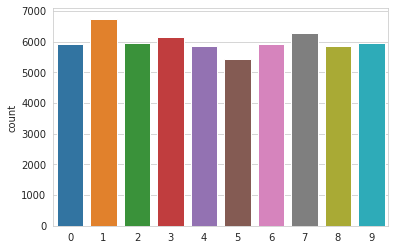

In [ ]:
# Your code here

### EDA

**Read the helper functions below, make sure you understand the code so that you can use it in the assignments below.**

In [ ]:
def plot_images(images, labels):
    '''Plot images with their labels. Ten each row'''
    plt.figure(figsize=(20, 10))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title(f"{labels[i]}", fontsize=16)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

def get_samples(n_samples, X, y):
    '''Get n_samples images randomly'''
    samples = np.random.choice(np.arange(len(y)), n_samples, replace=False)
    return X[samples], y[samples]

def get_digit(digit, n_samples, X, y):
    '''Get n_samples images of the class digit randomly'''
    y_digit = y[y == digit]
    X_digit = X[y == digit]
    return get_samples(n_samples, X_digit, y_digit)

**Example**

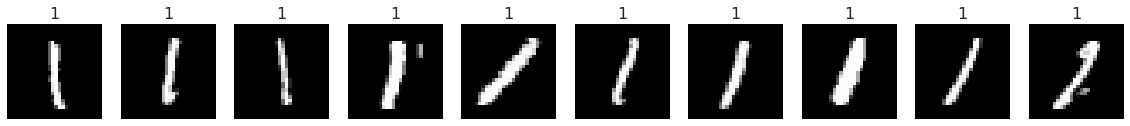

In [ ]:
n_samples = 10
images, labels = get_digit(1, n_samples, X_train, y_train)
plot_images(images, labels)

**Plot 20 samples of the digit 8**

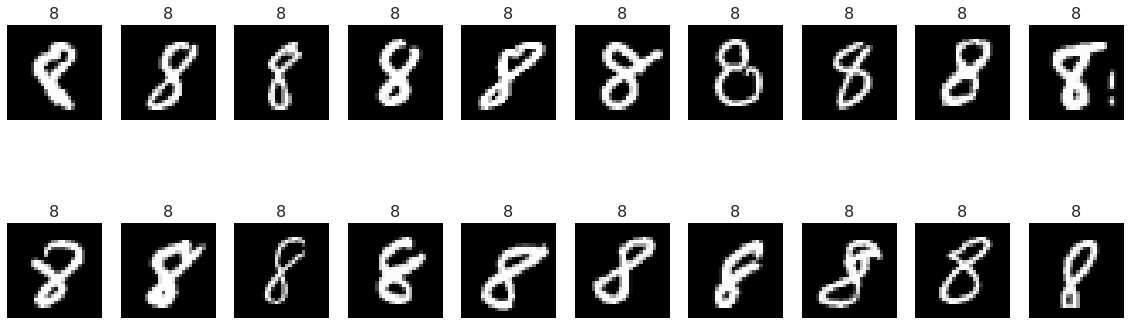

In [ ]:
# Your code here

**Get 1000 images randomly from training set and 200 from the test set. Then reshape them into long vectors**

In [ ]:
n_samples = ___
n_test_samples = ___

# Fill the blank
X_train_flat, y_train_flat = get_samples(___, ___, ___)
X_test_flat, y_test_flat = get_samples(___, ___, ___)

# Normalization
X_train_flat = X_train_flat.reshape((n_samples, -1))/___
X_test_flat = X_test_flat.reshape((n_test_samples, -1))/___

print(f'Training data: {X_train_flat.shape}')
print(f'Test data: {X_test_flat.shape}')
print(f'Range of pixel value: {X_train_flat.min()} - {X_train_flat.max()}')

Training data: (1000, 784)
Test data: (400, 784)
Range of pixel value: 0.0 - 1.0


In [ ]:
# Get all the data
# Run it after you finish training with the 1000 samples
# X_train_flat = X_train.reshape((-1, 784))
# X_test_flat = X_test.reshape((-1, 784))
# y_train_flat = y_train
# y_test_flat = y_test

# print('Training data', X_train_flat.shape)
# print('Test data', X_test_flat.shape)
# print('Training label', y_train_flat.shape)
# print('Test label', y_test_flat.shape)

## Train models

### Build and train a SVM model

In [ ]:
# Your code here

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Evaluate SVM model**

In [ ]:
# Example code
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

svm_predictions = svm_clf.predict(X_test_flat)
print(classification_report(y_test_flat, svm_predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        32
           1       0.96      0.98      0.97        51
           2       0.97      0.90      0.94        40
           3       0.90      0.97      0.94        37
           4       0.91      0.93      0.92        42
           5       0.97      0.93      0.95        30
           6       0.98      0.92      0.95        49
           7       0.95      0.86      0.90        43
           8       0.94      0.94      0.94        32
           9       0.89      0.95      0.92        44

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



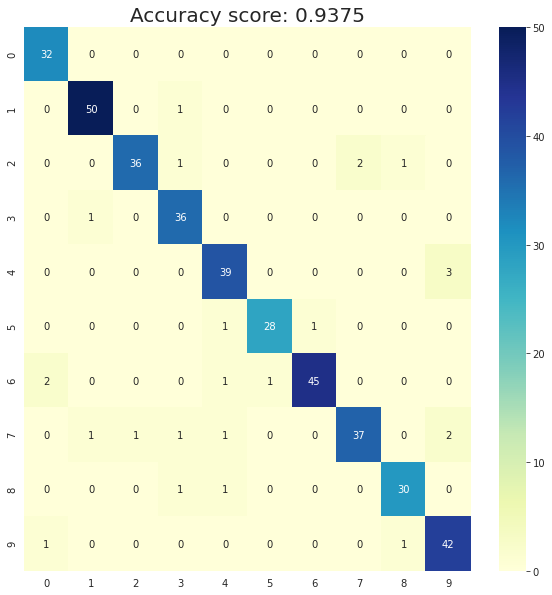

In [ ]:
# Example code
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test_flat, svm_predictions), cmap="YlGnBu", annot=True, fmt="d")
plt.title(f'Accuracy score: {accuracy_score(y_test_flat, svm_predictions)}', fontsize=20)
plt.show()

**Plot the samples that the model predicts incorrectly**

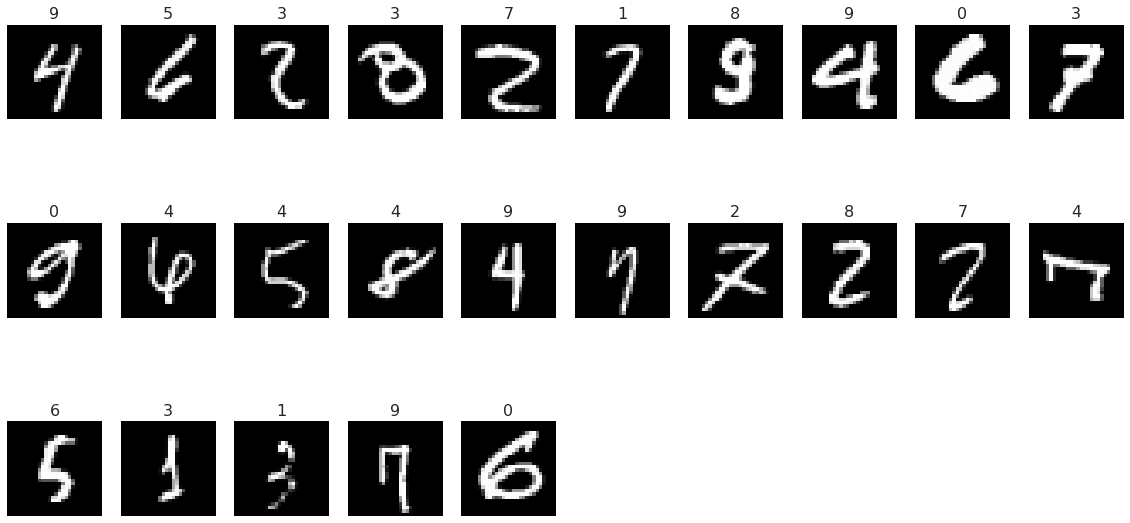

In [ ]:
# Fill the blank
wrong_predicted_images = X_test_flat[___].reshape((-1, 28, 28))
wrong_predictions = predictions[___]

plot_images(wrong_predicted_images, wrong_predictions)

**Hyperparameter tuning**

In [ ]:
# Example code
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

model = SVC(kernel='rbf')

gridsearch_models = GridSearchCV(estimator=model,
                                 param_grid=parameters,
                                 cv=5, n_jobs=-1)

# randomsearch_models = RandomizedSearchCV(estimator=model,
#                                  param_grid=parameters,
#                                  n_iter = 20
#                                  cv=5, n_jobs=-1)

gridsearch_models.fit(X_train_flat, y_train_flat)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print('Best params', gridsearch_models.best_params_)
print('Best score', gridsearch_models.best_score_)

Best params {'C': 10, 'gamma': 0.01}
Best score 0.9179999999999999


In [ ]:
best_svm_model = gridsearch_models.best_estimator_

**Save the model**

In [ ]:
# Example code
import pickle

pickle.dump(best_svm_model, open('svm_mnist.pkl', 'wb'))

**Re-load model for testing**

In [ ]:
# Example code
with open('svm_mnist.pkl', 'rb') as model:
    reloaded_model = pickle.load(model)

predictions = reloaded_model.predict(X_test_flat)
print(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}')

Accuracy score: 0.9425


### Build and train a Decision Tree model

`sklearn` Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# Your code here

### Build and train a Random Forest model

`sklearn` Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
# Your code here

### Build and train a XGBoost model

Reference: https://machinelearningmastery.com/xgboost-python-mini-course/

The most important hyper-parameters of XGBoost

* **n_estimators**: the number of trees
* **max_depth** : the size of trees
* **early_stopping_rounds**: Early Stopping causes the model to stop iterating when the validation score stops improving. E.g. `early_stopping_rounds=5` means stopping after 5 straight rounds without any improvement.
* **learning_rate**: In general, a small learning rate (and large number of estimators) will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle.
* **n_jobs**: It's common to set the parameter n_jobs equal to the number of cores on your machine.
* **subsample**, **colsample_bytree** and **colsample_bylevel**: The row and column subsampling rates

More in detail: [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)





In [ ]:
# Your code here